<a href="https://colab.research.google.com/github/wangxioanke/deep-learning-notebook/blob/main/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.7.0


In [4]:
cd /content/sample_data

/content/sample_data


**图像增广系列函数**

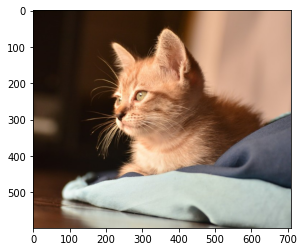

In [5]:
from matplotlib import pyplot as plt

img = plt.imread('cat.jpg')
plt.imshow(img)

**左右翻转**

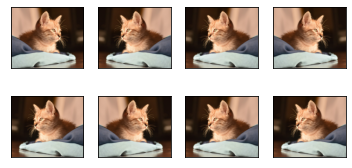

In [6]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

apply(img, tf.image.random_flip_left_right)

**上下翻转**

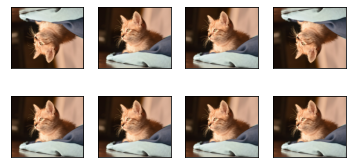

In [7]:
apply(img, tf.image.random_flip_up_down)

**随机采样面积，避免模型对位置的敏感度**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c0383b590>,
      dtype=object)

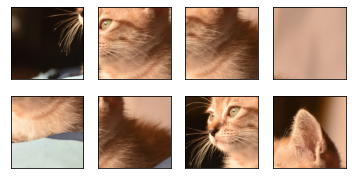

In [8]:
aug=tf.image.random_crop
num_rows=2
num_cols=4
scale=1.5
crop_size=200

Y = [aug(img, (crop_size, crop_size, 3)) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols, scale)

**变换光亮**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c035fa990>,
      dtype=object)

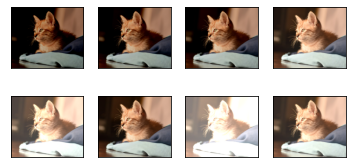

In [9]:
aug=tf.image.random_brightness
num_rows=2
num_cols=4
scale=1.5
max_delta=0.5

Y = [aug(img, max_delta) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols, scale)

**变换色彩**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c033a6fd0>,
      dtype=object)

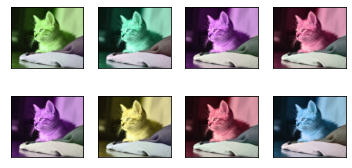

In [10]:
aug=tf.image.random_hue
num_rows=2
num_cols=4
scale=1.5
max_delta=0.5

Y = [aug(img, max_delta) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols, scale)